# Calculate CAA scavenging rates from observations

Dissolved trace metal data from Manuel Colombo, particulate trace metal data from Jingxuan Li.

Date: 2019-07-29

In [2]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
import seaborn as sns; sns.set()
from matplotlib.ticker import FormatStrFormatter

warnings.filterwarnings('ignore')

%matplotlib inline

In [53]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
Mn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

In [5]:
dMn_BB1 = Mn_data['BB1'].dropna()[1:].astype('float')
dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float')
dMn_BB3 = Mn_data['BB3'].dropna()[1:].astype('float')
dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float')
dMn_CB2 = Mn_data['CB2'].dropna()[1:].astype('float')
dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float')
dMn_CB4 = Mn_data['CB4'].dropna()[1:].astype('float')
dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float')
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float')
dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float')
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float')
dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float')
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float')
dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float')
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float')
dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float')

In [6]:
depth_BB1 = Mn_data['Depth.2'].dropna()
depth_BB2 = Mn_data['Depth.3'].dropna()
depth_BB3 = Mn_data['Depth.4'].dropna()
depth_CB1 = Mn_data['Depth.14'].dropna()
depth_CB2 = Mn_data['Depth.15'].dropna()
depth_CB3 = Mn_data['Depth.16'].dropna()
depth_CB4 = Mn_data['Depth.17'].dropna()
depth_CAA1 = Mn_data['Depth.5'].dropna()
depth_CAA2 = Mn_data['Depth.6'].dropna()
depth_CAA3 = Mn_data['Depth.7'].dropna()
depth_CAA4 = Mn_data['Depth.8'].dropna()
depth_CAA5 = Mn_data['Depth.9'].dropna()
depth_CAA6 = Mn_data['Depth.10'].dropna()
depth_CAA7 = Mn_data['Depth.11'].dropna()
depth_CAA8 = Mn_data['Depth.12'].dropna()
depth_CAA9 = Mn_data['Depth.13'].dropna()

In [7]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values

In [8]:
pMn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/pTM_Maldonado_DATA_v2_notes.csv')

In [9]:
stns = pMn_data['GEOTR_STN'].astype('str')
pMn_BB1 = pMn_data['Mn (pmol/L)'].where(stns == 'BB1').dropna().astype('float')*1e-3 # pM --> nM
pMn_BB2 = pMn_data['Mn (pmol/L)'].where(stns == 'BB2').dropna().astype('float')*1e-3
pMn_BB3 = pMn_data['Mn (pmol/L)'].where(stns == 'BB3').dropna().astype('float')*1e-3
pMn_CB1 = pMn_data['Mn (pmol/L)'].where(stns == 'CB1').dropna().astype('float')*1e-3
pMn_CB2 = pMn_data['Mn (pmol/L)'].where(stns == 'CB2').dropna().astype('float')*1e-3
pMn_CB3 = pMn_data['Mn (pmol/L)'].where(stns == 'CB3').dropna().astype('float')*1e-3
pMn_CB4 = pMn_data['Mn (pmol/L)'].where(stns == 'CB4').dropna().astype('float')*1e-3
pMn_CAA1 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA1').dropna().astype('float')*1e-3
pMn_CAA2 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA2').dropna().astype('float')*1e-3
pMn_CAA3 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA3').dropna().astype('float')*1e-3
pMn_CAA4 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA4').dropna().astype('float')*1e-3
pMn_CAA5 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA5').dropna().astype('float')*1e-3
pMn_CAA6 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA6').dropna().astype('float')*1e-3
pMn_CAA7 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA7').dropna().astype('float')*1e-3
pMn_CAA8 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA8').dropna().astype('float')*1e-3
pMn_CAA9 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA9').dropna().astype('float')*1e-3

In [10]:
pdepth_BB1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB1').dropna().astype('float')
pdepth_BB2 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB2').dropna().astype('float')
pdepth_BB3 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB3').dropna().astype('float')
pdepth_CB1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB1').dropna().astype('float')
pdepth_CB2 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB2').dropna().astype('float')
pdepth_CB3 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB3').dropna().astype('float')
pdepth_CB4 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB4').dropna().astype('float')
pdepth_CAA1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA1').dropna().astype('float')
pdepth_CAA2 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA2').dropna().astype('float')
pdepth_CAA3 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA3').dropna().astype('float')
pdepth_CAA4 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA4').dropna().astype('float')
pdepth_CAA5 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA5').dropna().astype('float')
pdepth_CAA6 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA6').dropna().astype('float')
pdepth_CAA7 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA7').dropna().astype('float')
pdepth_CAA8 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA8').dropna().astype('float')
pdepth_CAA9 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA9').dropna().astype('float')

For each station, find a similar depth:

In [11]:
def assoc_depth(depth_pMn, depth_dMn, pMn_stn, dMn_stn):
    if len(depth_pMn) > len(depth_dMn):
        depth_list = depth_pMn
        depth_shorter = depth_dMn
    else:
        depth_list = depth_dMn
        depth_shorter = depth_pMn

    depths= np.empty_like(depth_list)
    pMn   = np.empty_like(depth_list)
    dMn   = np.empty_like(depth_list)
    i=0

    for depth in depth_list:
        min_val  = np.argmin(np.abs(depth_shorter - depth))
        if np.abs(depth_shorter[min_val] - depth) > 10:
            depths[i] = np.nan
            pMn[i]    = np.nan
            dMn[i]    = np.nan
        else:
            depths[i] = depth_shorter[min_val]
            if len(depth_pMn) > len(depth_dMn):
                pMn[i]    = pMn_stn[i]
                dMn[i]    = dMn_stn[min_val]                
            else:
                pMn[i]    = pMn_stn[min_val]
                dMn[i]    = dMn_stn[i+1] #indexed starting with 1 instead of 0
        i+=1
        
    return depths, pMn, dMn

In [26]:
depths_CAA1, pmn_CAA1, dmn_CAA1 = assoc_depth(pdepth_CAA1, depth_CAA1, pMn_CAA1, dMn_CAA1)
# depths_CAA2, pmn_CAA2, dmn_CAA2 = assoc_depth(pdepth_CAA2, depth_CAA2, pMn_CAA2, dMn_CAA2)
depths_CAA3, pmn_CAA3, dmn_CAA3 = assoc_depth(pdepth_CAA3, depth_CAA3, pMn_CAA3, dMn_CAA3)
depths_CAA4, pmn_CAA4, dmn_CAA4 = assoc_depth(pdepth_CAA4, depth_CAA4, pMn_CAA4, dMn_CAA4)
depths_CAA5, pmn_CAA5, dmn_CAA5 = assoc_depth(pdepth_CAA5, depth_CAA5, pMn_CAA5, dMn_CAA5)
depths_CAA6, pmn_CAA6, dmn_CAA6 = assoc_depth(pdepth_CAA6, depth_CAA6, pMn_CAA6, dMn_CAA6)
depths_CAA7, pmn_CAA7, dmn_CAA7 = assoc_depth(pdepth_CAA7, depth_CAA7, pMn_CAA7, dMn_CAA7)
depths_CAA8, pmn_CAA8, dmn_CAA8 = assoc_depth(pdepth_CAA8, depth_CAA8, pMn_CAA8, dMn_CAA8)
depths_CAA9, pmn_CAA9, dmn_CAA9 = assoc_depth(pdepth_CAA9, depth_CAA9, pMn_CAA9, dMn_CAA9)

In [27]:
depths_CB1, pmn_CB1, dmn_CB1 = assoc_depth(pdepth_CB1, depth_CB1, pMn_CB1, dMn_CB1)
depths_CB2, pmn_CB2, dmn_CB2 = assoc_depth(pdepth_CB2, depth_CB2, pMn_CB2, dMn_CB2)
depths_CB3, pmn_CB3, dmn_CB3 = assoc_depth(pdepth_CB3, depth_CB3, pMn_CB3, dMn_CB3)
depths_CB4, pmn_CB4, dmn_CB4 = assoc_depth(pdepth_CB4, depth_CB4, pMn_CB4, dMn_CB4)

In [28]:
depths_BB1, pmn_BB1, dmn_BB1 = assoc_depth(pdepth_BB1, depth_BB1, pMn_BB1, dMn_BB1)
depths_BB2, pmn_BB2, dmn_BB2 = assoc_depth(pdepth_BB2, depth_BB2, pMn_BB2, dMn_BB2)
depths_BB3, pmn_BB3, dmn_BB3 = assoc_depth(pdepth_BB3, depth_BB3, pMn_BB3, dMn_BB3)

## Calculating scavenging rates:

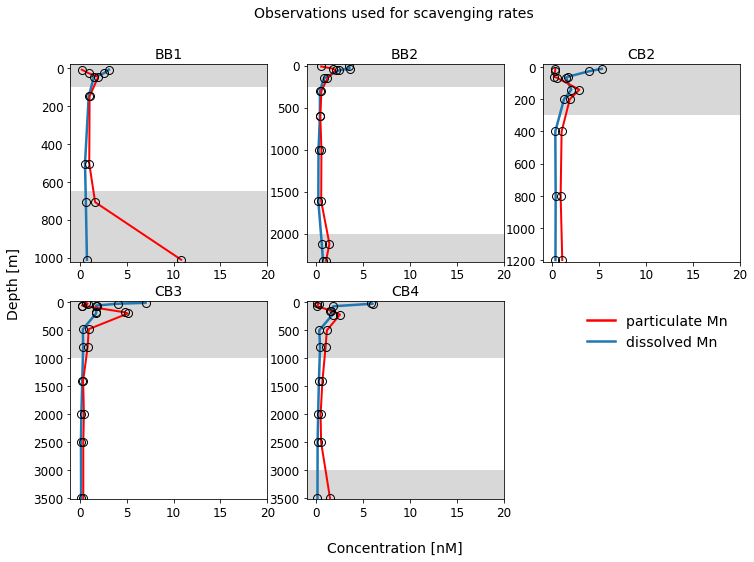

In [27]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
for axs in ax[0,:]:
    axs.invert_yaxis()
    axs.set_xlim([-1, 20])
    axs.tick_params(axis='both', which='major', labelsize=12)

for axs in ax[1,:]:
    axs.invert_yaxis()
    axs.set_xlim([-1, 20])
    axs.tick_params(axis='both', which='major', labelsize=12)

ax[1,2].axis('off')
    
fig.suptitle('Observations used for scavenging rates', fontsize=14)

ax[0,0].plot(dmn_BB1[~np.isnan(dmn_BB1)], depths_BB1[~np.isnan(dmn_BB1)], '-', linewidth=2.5)
ax[0,1].plot(dmn_BB2[~np.isnan(dmn_BB2)], depths_BB2[~np.isnan(dmn_BB2)], '-', linewidth=2.5)
ax[0,2].plot(dmn_CB2[~np.isnan(dmn_CB2)], depths_CB2[~np.isnan(dmn_CB2)], '-', linewidth=2.5)
ax[1,0].plot(dmn_CB3[~np.isnan(dmn_CB3)], depths_CB3[~np.isnan(dmn_CB3)], '-', linewidth=2.5)
ax[1,1].plot(dmn_CB4[~np.isnan(dmn_CB4)], depths_CB4[~np.isnan(dmn_CB4)], '-', linewidth=2.5)

ax[0,0].plot(pmn_BB1[~np.isnan(pmn_BB1)], depths_BB1[~np.isnan(pmn_BB1)], '-r', linewidth=2.0)
ax[0,1].plot(pmn_BB2[~np.isnan(pmn_BB2)], depths_BB2[~np.isnan(pmn_BB2)], '-r', linewidth=2.0)
ax[0,2].plot(pmn_CB2[~np.isnan(pmn_CB2)], depths_CB2[~np.isnan(pmn_CB2)], '-r', linewidth=2.0)
ax[1,0].plot(pmn_CB3[~np.isnan(pmn_CB3)], depths_CB3[~np.isnan(pmn_CB3)], '-r', linewidth=2.0)
ax[1,1].plot(pmn_CB4[~np.isnan(pmn_CB4)], depths_CB4[~np.isnan(pmn_CB4)], '-r', linewidth=2.0)

ax[0,0].plot(dmn_BB1[~np.isnan(dmn_BB1)], depths_BB1[~np.isnan(dmn_BB1)], 'ok', fillstyle='none', markersize=8)
ax[0,1].plot(dmn_BB2[~np.isnan(dmn_BB2)], depths_BB2[~np.isnan(dmn_BB2)], 'ok', fillstyle='none', markersize=8)
ax[0,2].plot(dmn_CB2[~np.isnan(dmn_CB2)], depths_CB2[~np.isnan(dmn_CB2)], 'ok', fillstyle='none', markersize=8)
ax[1,0].plot(dmn_CB3[~np.isnan(dmn_CB3)], depths_CB3[~np.isnan(dmn_CB3)], 'ok', fillstyle='none', markersize=8)
ax[1,1].plot(dmn_CB4[~np.isnan(dmn_CB4)], depths_CB4[~np.isnan(dmn_CB4)], 'ok', fillstyle='none', markersize=8)

ax[0,0].plot(pmn_BB1[~np.isnan(pmn_BB1)], depths_BB1[~np.isnan(pmn_BB1)], 'ok', fillstyle='none', markersize=8)
ax[0,1].plot(pmn_BB2[~np.isnan(pmn_BB2)], depths_BB2[~np.isnan(pmn_BB2)], 'ok', fillstyle='none', markersize=8)
ax[0,2].plot(pmn_CB2[~np.isnan(pmn_CB2)], depths_CB2[~np.isnan(pmn_CB2)], 'ok', fillstyle='none', markersize=8)
ax[1,0].plot(pmn_CB3[~np.isnan(pmn_CB3)], depths_CB3[~np.isnan(pmn_CB3)], 'ok', fillstyle='none', markersize=8)
ax[1,1].plot(pmn_CB4[~np.isnan(pmn_CB4)], depths_CB4[~np.isnan(pmn_CB4)], 'ok', fillstyle='none', markersize=8)


#grey boxes:
ax[0,0].fill_between([-2,20], [-20,-20], [100,100], facecolor='grey', alpha=0.3)
ax[0,0].fill_between([-2,20], [650,650], [depths_BB1[-1]+80, depths_BB1[-1]+80], facecolor='grey', alpha=0.3)
ax[0,0].set_ylim([depths_BB1[-1]+10, -20])
ax[0,1].fill_between([-2,20], [-20,-20]    , [250, 250], facecolor='grey', alpha=0.3)
ax[0,1].fill_between([-2,20], [2000,2000], [depths_BB2[-1]+80, depths_BB2[-1]+80], facecolor='grey', alpha=0.3)
ax[0,1].set_ylim([depths_BB2[-1]+10, -20])
ax[0,2].fill_between([-2,20], [-20,-20]  ,[300,300], facecolor='grey', alpha=0.3)
ax[0,2].fill_between([-2,20], [1250,1250], [depths_CB2[-1]+80, depths_CB2[-1]+80], facecolor='grey', alpha=0.3)
ax[0,2].set_ylim([depths_CB2[-1]+10, -20])
ax[1,0].fill_between([-2,20], [-20,-20]  ,[1000,1000], facecolor='grey', alpha=0.3)
ax[1,0].set_ylim([depths_CB3[-1]+10, -20])
ax[1,1].fill_between([-2,20], [-20,-20]  ,[1000,1000], facecolor='grey', alpha=0.3)
ax[1,1].fill_between([-2,20], [3000,3000], [depths_CB4[-1]+80, depths_CB4[-1]+80], facecolor='grey', alpha=0.3)
ax[1,1].set_ylim([depths_CB4[-1]+10, -20])

ax[1,2].plot(-1,2, '-r', linewidth=2.5, label='particulate Mn')
ax[1,2].plot(-1,2, '-', linewidth=2.5, label='dissolved Mn')

ax[0,0].set_title('BB1', fontsize=14)
ax[0,1].set_title('BB2', fontsize=14)
ax[0,2].set_title('CB2', fontsize=14)
ax[1,0].set_title('CB3', fontsize=14)
ax[1,1].set_title('CB4', fontsize=14)

ax[1,2].legend(frameon=False, fontsize=14)

fig.text(0.5, 0.04, 'Concentration [nM]', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Depth [m]', ha='center', va='center', rotation='vertical', fontsize=14)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/scavenging_used.png', bbox_inches='tight')

In [ ]:
# Baffin Bay --------------------------------------------------------------------
# ax[1,1].text(0.09, 0.5, 'Baffin Bay')
bdy_colours[3] = '#36ab92'

fig = plt.figure(figsize=(8,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates_2002, np.divide(cumsum_riv2002-cumsum_2002,cumsum_2002)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2003, np.divide(cumsum_riv2003-cumsum_2003,cumsum_2003)*100, linewidth=4.5, color=bdy_colours[3])

    # sns.axes_style("whitegrid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    ax.set(ylim=(0, 6), xlim=(dt.datetime(2002,1,1), dt.datetime(2016,1,1)))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');

In [46]:
print(dmn_BB1.shape, pmn_BB1.shape)
print(dmn_BB1[~np.isnan(dmn_BB1)])

(12,) (12,)
[3.102 2.562 1.524 0.955 0.562 0.653 0.768]


In [68]:
dmn = np.concatenate((dmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)], \
                      dmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                      dmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                      dmn_CB3[depths_CB3 > 500], \
                      dmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)]))
pmn = np.concatenate((pmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)], \
                      pmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                      pmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                      pmn_CB3[depths_CB3 > 500], \
                      pmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)]))

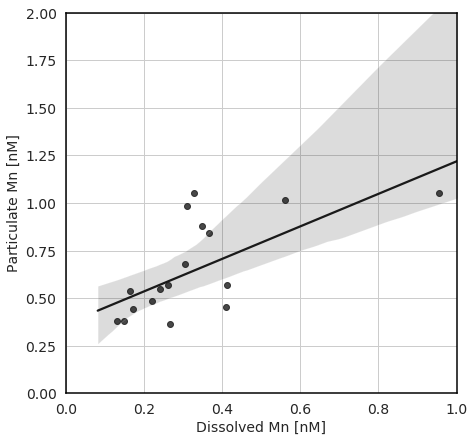

In [89]:
fig = plt.figure(figsize=(7,7))

with st:
#     sns.lineplot(xp, yp_pred, c='k')
    ax = sns.regplot(dmn, pmn, scatter=True, robust=True, color='k')
    
    ax.set_ylabel('Particulate Mn [nM]', fontsize=14)
    ax.set_xlabel('Dissolved Mn [nM]', fontsize=14)
    ax.set(ylim=(0,2.0), xlim=(0,1.0))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');    

slope:  [1.71667249]


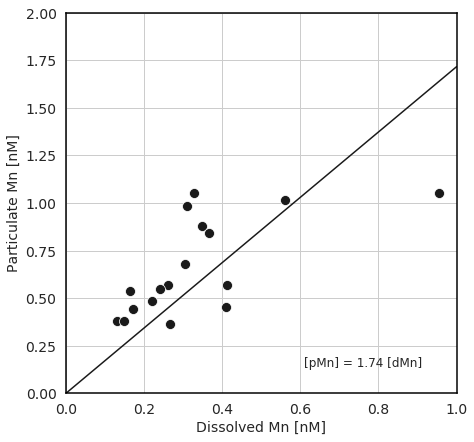

In [93]:
fig = plt.figure(figsize=(7,7))

xp      = np.linspace(0,1.0,20)
xp_fit  = xp.reshape((-1, 1)) 
dmn_fit = dmn.reshape((-1, 1))
pmn_fit = pmn
model   = LinearRegression(fit_intercept=False).fit(dmn_fit, pmn_fit)
r_sq    = model.score(dmn_fit, pmn_fit)
yp_pred = model.predict(xp_fit)
print('slope: ', model.coef_)


st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(xp, yp_pred, c='k')

#     sns.scatterplot(dmn_BB1, pmn_BB1, s=100, color='#bbbbbb')
#     sns.scatterplot(dmn_BB2, pmn_BB2, s=100, color='#bbbbbb')
#     sns.scatterplot(dmn_CB2, pmn_CB2, s=100, color='#bbbbbb')
#     sns.scatterplot(dmn_CB3, pmn_CB3, s=100, color='#bbbbbb')
#     sns.scatterplot(dmn_CB4, pmn_CB4, s=100, color='#bbbbbb')

    sns.scatterplot(dmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)],  \
                    pmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)],  s=100, color='k')
    sns.scatterplot(dmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                    pmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], s=100, color='k')
    sns.scatterplot(dmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                    pmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], s=100, color='k')
    sns.scatterplot(dmn_CB3[depths_CB3 > 500], \
                    pmn_CB3[depths_CB3 > 500], s=100, color='k')
    sns.scatterplot(dmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)], \
                    pmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)], s=100, color='k')

    ax.set_ylabel('Particulate Mn [nM]', fontsize=14)
    ax.set_xlabel('Dissolved Mn [nM]', fontsize=14)
    ax.set(ylim=(0,2.0), xlim=(0,1.0))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');    
    
    ax.text(0.76, 0.08,'[pMn] = 1.74 [dMn]', fontsize=12, horizontalalignment='center', \
            verticalalignment='center', transform=ax.transAxes);

fig.savefig('/ocean/brogalla/GEOTRACES/figures/scav_rate.png', bbox_inches='tight', dpi=300)

In [13]:
print('Original ratio')
red=4.73e-7
oxi=0.946e-7
print('Reduction rate: ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Original ratio
Reduction rate:  4.73e-07
Oxidation rate:  9.46e-08
[pMn]/[dMn] = k_ox/k_red =  0.19999999999999998


In [14]:
oxi=1.5*0.946e-7
red=0.946e-7
print('Reduction rate: ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Reduction rate:  9.46e-08
Oxidation rate:  1.419e-07
[pMn]/[dMn] = k_ox/k_red =  1.5


In [11]:
oxi=0.8*0.946e-7
red=0.946e-7
print('Reduction rate: ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Reduction rate:  9.46e-08
Oxidation rate:  7.568e-08
[pMn]/[dMn] = k_ox/k_red =  0.8


In [15]:
oxi=0.5*0.946e-7
red=0.946e-7
print('Reduction rate: ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Reduction rate:  9.46e-08
Oxidation rate:  4.73e-08
[pMn]/[dMn] = k_ox/k_red =  0.5


In [19]:
oxi=2*0.5*0.946e-7
red=2*0.946e-7
print('Reduction rate: ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Reduction rate:  1.892e-07
Oxidation rate:  9.46e-08
[pMn]/[dMn] = k_ox/k_red =  0.5


In [17]:
oxi=1.1*0.946e-7
red=0.946e-7
print('Reduction rate:n ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Reduction rate:n  9.46e-08
Oxidation rate:  1.0406000000000001e-07
[pMn]/[dMn] = k_ox/k_red =  1.1


In [13]:
oxi=0.9*0.946e-7
red=0.946e-7
print('Reduction rate:n ', red)
print('Oxidation rate: ', oxi)
print('[pMn]/[dMn] = k_ox/k_red = ', oxi/red)

Reduction rate:n  9.46e-08
Oxidation rate:  8.514000000000001e-08
[pMn]/[dMn] = k_ox/k_red =  0.9


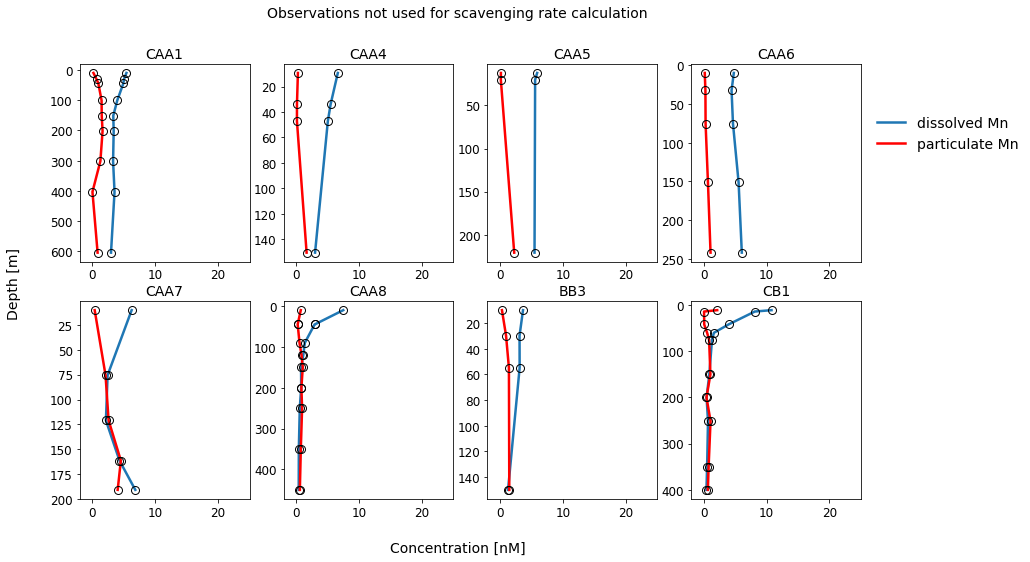

In [30]:
fig, ax = plt.subplots(2,4, figsize=(14,8))
for axs in ax[0,:]:
    axs.invert_yaxis()
    axs.set_xlim([-2, 25])
    axs.tick_params(axis='both', which='major', labelsize=12)

for axs in ax[1,:]:
    axs.invert_yaxis()
    axs.set_xlim([-2, 25])
    axs.tick_params(axis='both', which='major', labelsize=12)

fig.suptitle('Observations not used for scavenging rate calculation', fontsize=14)

ax[0,0].plot(dmn_CAA1[~np.isnan(dmn_CAA1)], depths_CAA1[~np.isnan(dmn_CAA1)], '-', linewidth=2.5)
ax[0,0].plot(pmn_CAA1[~np.isnan(pmn_CAA1)], depths_CAA1[~np.isnan(pmn_CAA1)], '-r', linewidth=2.5)
ax[0,1].plot(dmn_CAA4[~np.isnan(dmn_CAA4)], depths_CAA4[~np.isnan(dmn_CAA4)], '-', linewidth=2.5)
ax[0,1].plot(pmn_CAA4[~np.isnan(pmn_CAA4)], depths_CAA4[~np.isnan(pmn_CAA4)], '-r', linewidth=2.5)
ax[0,2].plot(dmn_CAA5[~np.isnan(dmn_CAA5)], depths_CAA5[~np.isnan(dmn_CAA5)], '-', linewidth=2.5)
ax[0,2].plot(pmn_CAA5[~np.isnan(pmn_CAA5)], depths_CAA5[~np.isnan(pmn_CAA5)], '-r', linewidth=2.5)
ax[0,3].plot(dmn_CAA6[~np.isnan(dmn_CAA6)], depths_CAA6[~np.isnan(dmn_CAA6)], '-', linewidth=2.5)
ax[0,3].plot(pmn_CAA6[~np.isnan(pmn_CAA6)], depths_CAA6[~np.isnan(pmn_CAA6)], '-r', linewidth=2.5)

ax[1,0].plot(dmn_CAA7[~np.isnan(dmn_CAA7)], depths_CAA7[~np.isnan(dmn_CAA7)], '-', linewidth=2.5)
ax[1,0].plot(pmn_CAA7[~np.isnan(pmn_CAA7)], depths_CAA7[~np.isnan(pmn_CAA7)], '-r', linewidth=2.5)
ax[1,1].plot(dmn_CAA8[~np.isnan(dmn_CAA8)], depths_CAA8[~np.isnan(dmn_CAA8)], '-', linewidth=2.5)
ax[1,1].plot(pmn_CAA8[~np.isnan(pmn_CAA8)], depths_CAA8[~np.isnan(pmn_CAA8)], '-r', linewidth=2.5)
ax[1,2].plot(dmn_BB3[~np.isnan(dmn_BB3)], depths_BB3[~np.isnan(dmn_BB3)], '-', linewidth=2.5)
ax[1,2].plot(pmn_BB3[~np.isnan(pmn_BB3)], depths_BB3[~np.isnan(pmn_BB3)], '-r', linewidth=2.5)
ax[1,3].plot(dmn_CB1[~np.isnan(dmn_CB1)], depths_CB1[~np.isnan(dmn_CB1)], '-', linewidth=2.5, label='dissolved Mn')
ax[1,3].plot(pmn_CB1[~np.isnan(pmn_CB1)], depths_CB1[~np.isnan(pmn_CB1)], '-r', linewidth=2.5, label='particulate Mn')

ax[0,0].set_title('CAA1', fontsize=14)
ax[0,1].set_title('CAA4', fontsize=14)
ax[0,2].set_title('CAA5', fontsize=14)
ax[0,3].set_title('CAA6', fontsize=14)
ax[1,0].set_title('CAA7', fontsize=14)
ax[1,1].set_title('CAA8', fontsize=14)
ax[1,2].set_title('BB3', fontsize=14)
ax[1,3].set_title('CB1', fontsize=14)

ax[0,0].plot(dmn_CAA1[~np.isnan(dmn_CAA1)], depths_CAA1[~np.isnan(dmn_CAA1)], 'ok', fillstyle='none', markersize=8)
ax[0,0].plot(pmn_CAA1[~np.isnan(pmn_CAA1)], depths_CAA1[~np.isnan(pmn_CAA1)], 'ok', fillstyle='none', markersize=8)
ax[0,1].plot(dmn_CAA4[~np.isnan(dmn_CAA4)], depths_CAA4[~np.isnan(dmn_CAA4)], 'ok', fillstyle='none', markersize=8)
ax[0,1].plot(pmn_CAA4[~np.isnan(pmn_CAA4)], depths_CAA4[~np.isnan(pmn_CAA4)], 'ok', fillstyle='none', markersize=8)
ax[0,2].plot(dmn_CAA5[~np.isnan(dmn_CAA5)], depths_CAA5[~np.isnan(dmn_CAA5)], 'ok', fillstyle='none', markersize=8)
ax[0,2].plot(pmn_CAA5[~np.isnan(pmn_CAA5)], depths_CAA5[~np.isnan(pmn_CAA5)], 'ok', fillstyle='none', markersize=8)
ax[0,3].plot(dmn_CAA6[~np.isnan(dmn_CAA6)], depths_CAA6[~np.isnan(dmn_CAA6)], 'ok', fillstyle='none', markersize=8)
ax[0,3].plot(pmn_CAA6[~np.isnan(pmn_CAA6)], depths_CAA6[~np.isnan(pmn_CAA6)], 'ok', fillstyle='none', markersize=8)

ax[1,0].plot(dmn_CAA7[~np.isnan(dmn_CAA7)], depths_CAA7[~np.isnan(dmn_CAA7)], 'ok', fillstyle='none', markersize=8)
ax[1,0].plot(pmn_CAA7[~np.isnan(pmn_CAA7)], depths_CAA7[~np.isnan(pmn_CAA7)], 'ok', fillstyle='none', markersize=8)
ax[1,1].plot(dmn_CAA8[~np.isnan(dmn_CAA8)], depths_CAA8[~np.isnan(dmn_CAA8)], 'ok', fillstyle='none', markersize=8)
ax[1,1].plot(pmn_CAA8[~np.isnan(pmn_CAA8)], depths_CAA8[~np.isnan(pmn_CAA8)], 'ok', fillstyle='none', markersize=8)
ax[1,2].plot(dmn_BB3[~np.isnan(dmn_BB3)], depths_BB3[~np.isnan(dmn_BB3)], 'ok', fillstyle='none', markersize=8)
ax[1,2].plot(pmn_BB3[~np.isnan(pmn_BB3)], depths_BB3[~np.isnan(pmn_BB3)], 'ok', fillstyle='none', markersize=8)
ax[1,3].plot(dmn_CB1[~np.isnan(dmn_CB1)], depths_CB1[~np.isnan(dmn_CB1)], 'ok', fillstyle='none', markersize=8)
ax[1,3].plot(pmn_CB1[~np.isnan(pmn_CB1)], depths_CB1[~np.isnan(pmn_CB1)], 'ok', fillstyle='none', markersize=8)

ax[1,3].legend(bbox_to_anchor=(2.0, 2.0), frameon=False, fontsize=14)

fig.text(0.5, 0.04, 'Concentration [nM]', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Depth [m]', ha='center', va='center', rotation='vertical', fontsize=14)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/scavenging_not_used.png', bbox_inches='tight')

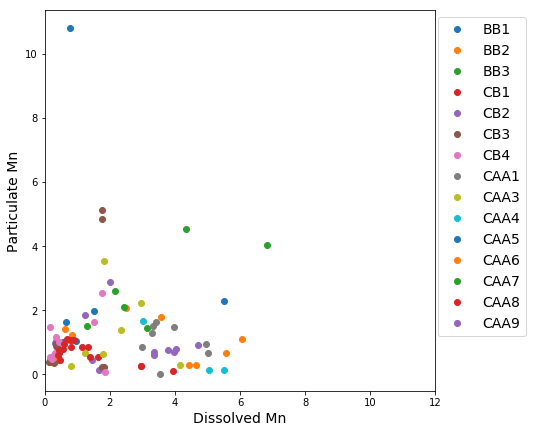

In [31]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.plot(dmn_BB1[depths_BB1 > 30], pmn_BB1[depths_BB1 > 30], '.', markersize=12, label='BB1')
ax.plot(dmn_BB2[depths_BB2 > 30], pmn_BB2[depths_BB2 > 30], '.', markersize=12, label='BB2')
ax.plot(dmn_BB3[depths_BB3 > 30], pmn_BB3[depths_BB3 > 30], '.', markersize=12, label='BB3')

ax.plot(dmn_CB1[depths_CB1 > 30], pmn_CB1[depths_CB1 > 30], '.', markersize=12, label='CB1')
ax.plot(dmn_CB2[depths_CB2 > 30], pmn_CB2[depths_CB2 > 30], '.', markersize=12, label='CB2')
ax.plot(dmn_CB3[depths_CB3 > 30], pmn_CB3[depths_CB3 > 30], '.', markersize=12, label='CB3')
ax.plot(dmn_CB4[depths_CB4 > 30], pmn_CB4[depths_CB4 > 30], '.', markersize=12, label='CB4')

ax.plot(dmn_CAA1[depths_CAA1 > 30], pmn_CAA1[depths_CAA1 > 30], '.', markersize=12, label='CAA1')
ax.plot(dmn_CAA3[depths_CAA3 > 30], pmn_CAA3[depths_CAA3 > 30], '.', markersize=12, label='CAA3')
ax.plot(dmn_CAA4[depths_CAA4 > 30], pmn_CAA4[depths_CAA4 > 30], '.', markersize=12, label='CAA4')
ax.plot(dmn_CAA5[depths_CAA5 > 30], pmn_CAA5[depths_CAA5 > 30], '.', markersize=12, label='CAA5')
ax.plot(dmn_CAA6[depths_CAA6 > 30], pmn_CAA6[depths_CAA6 > 30], '.', markersize=12, label='CAA6')
ax.plot(dmn_CAA7[depths_CAA7 > 30], pmn_CAA7[depths_CAA7 > 30], '.', markersize=12, label='CAA7')
ax.plot(dmn_CAA8[depths_CAA8 > 30], pmn_CAA8[depths_CAA8 > 30], '.', markersize=12, label='CAA8')
ax.plot(dmn_CAA9[depths_CAA9 > 30], pmn_CAA9[depths_CAA9 > 30], '.', markersize=12, label='CAA9')

# xp = np.linspace(0,12,10)
# ax.plot(xp, xp*5.0,'--k',linewidth=2)
# ax.plot(xp, xp*2.4,'-.k',linewidth=2)
# ax.plot(xp, xp*0.5,'--k',linewidth=2)
ax.set_xlim([0, 12])

ax.set_ylabel('Particulate Mn', fontsize=14)
ax.set_xlabel('Dissolved Mn', fontsize=14)
ax.legend(bbox_to_anchor=(1.25, 1.00), fontsize=14)

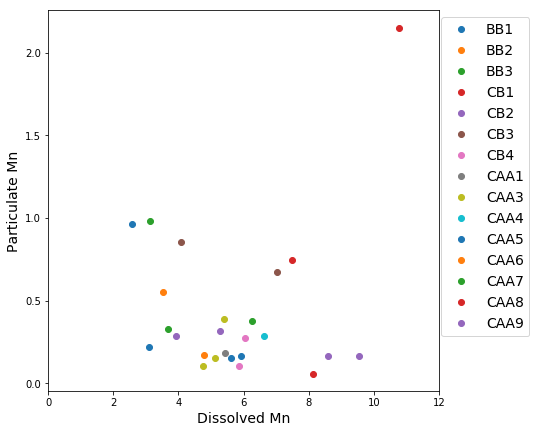

In [32]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.plot(dmn_BB1[depths_BB1 < 30], pmn_BB1[depths_BB1 < 30], '.', markersize=12, label='BB1')
ax.plot(dmn_BB2[depths_BB2 < 30], pmn_BB2[depths_BB2 < 30], '.', markersize=12, label='BB2')
ax.plot(dmn_BB3[depths_BB3 < 30], pmn_BB3[depths_BB3 < 30], '.', markersize=12, label='BB3')

ax.plot(dmn_CB1[depths_CB1 < 30], pmn_CB1[depths_CB1 < 30], '.', markersize=12, label='CB1')
ax.plot(dmn_CB2[depths_CB2 < 30], pmn_CB2[depths_CB2 < 30], '.', markersize=12, label='CB2')
ax.plot(dmn_CB3[depths_CB3 < 30], pmn_CB3[depths_CB3 < 30], '.', markersize=12, label='CB3')
ax.plot(dmn_CB4[depths_CB4 < 30], pmn_CB4[depths_CB4 < 30], '.', markersize=12, label='CB4')

ax.plot(dmn_CAA1[depths_CAA1 < 30], pmn_CAA1[depths_CAA1 < 30], '.', markersize=12, label='CAA1')
ax.plot(dmn_CAA3[depths_CAA3 < 30], pmn_CAA3[depths_CAA3 < 30], '.', markersize=12, label='CAA3')
ax.plot(dmn_CAA4[depths_CAA4 < 30], pmn_CAA4[depths_CAA4 < 30], '.', markersize=12, label='CAA4')
ax.plot(dmn_CAA5[depths_CAA5 < 30], pmn_CAA5[depths_CAA5 < 30], '.', markersize=12, label='CAA5')
ax.plot(dmn_CAA6[depths_CAA6 < 30], pmn_CAA6[depths_CAA6 < 30], '.', markersize=12, label='CAA6')
ax.plot(dmn_CAA7[depths_CAA7 < 30], pmn_CAA7[depths_CAA7 < 30], '.', markersize=12, label='CAA7')
ax.plot(dmn_CAA8[depths_CAA8 < 30], pmn_CAA8[depths_CAA8 < 30], '.', markersize=12, label='CAA8')
ax.plot(dmn_CAA9[depths_CAA9 < 30], pmn_CAA9[depths_CAA9 < 30], '.', markersize=12, label='CAA9')

xp = np.linspace(0,12,10)
# ax.plot(xp, xp*5.0,'--k',linewidth=2)
# ax.plot(xp, xp*2.4,'-.k',linewidth=2)
# ax.plot(xp, xp*0.5,'--k',linewidth=2)
ax.set_xlim([0, 12])

ax.set_ylabel('Particulate Mn', fontsize=14)
ax.set_xlabel('Dissolved Mn', fontsize=14)
ax.legend(bbox_to_anchor=(1.25, 1.00), fontsize=14)